In [1]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "0"

import numpy as np
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
# jax.config.update("jax_platforms", 'cpu')

from ImageD11.unitcell import unitcell
from ImageD11.parameters import AnalysisSchema
from ImageD11.columnfile import columnfile

In [2]:
import ImageD11
asc = ImageD11.unitcell.Phases.from_json('pars.json')
ucell = asc.unitcells['Cu']
ucell

Cu | [ 3.615  3.615  3.615 90.    90.    90.   ] | 225

In [3]:
pars = asc.geometry_pars_obj

In [4]:
npx = 2_048

In [5]:
pars.set('distance', 130e3)  # 130 mm
pars.set('wavelength', 0.1771)
pars.set('y_center', npx//2)
pars.set('z_center', npx//2)
pars.set('chi', 0.0)
pars.set('wedge', 0.0)
pars.set('y_size', 75.0)
pars.set('z_size', 75.0)
pars.set('tilt_x', 0.0)
pars.set('tilt_y', 0.0)
pars.set('tilt_z', 0.0)

In [6]:
pars.get_parameters()

{'chi': 0.0,
 'distance': 130000.0,
 'fit_tolerance': 0.05,
 'min_bin_prob': 1e-05,
 'no_bins': 10000,
 'o11': -1,
 'o12': 0,
 'o21': 0,
 'o22': -1,
 'omegasign': 1.0,
 't_x': 0.0,
 't_y': 0.0,
 't_z': 0.0,
 'tilt_x': 0.0,
 'tilt_y': 0.0,
 'tilt_z': 0.0,
 'wavelength': 0.1771,
 'wedge': 0.0,
 'weight_hist_intensities': 'False',
 'y_center': 1024,
 'y_size': 75.0,
 'z_center': 1024,
 'z_size': 75.0}

In [7]:
import Dans_Diffraction as dif

crystal = dif.Crystal('EntryWithCollCode7954_scaled.cif')
crystal.Scatter.setup_scatter(scattering_type='xray',
                              wavelength_a=asc.geometry_pars_obj.get('wavelength'), 
                              powder_units='twotheta',
                              min_twotheta=0.1,
                              max_twotheta=30,
                              min_theta=-np.inf,
                              max_theta=np.inf
                             )

Scatter(EntryWithCollCode7954_scaled with 1 atomic positions, 192 symmetries)
       Type: xray
     Energy: 70.00814733413704 keV
 Wavelength: 0.17709999999999998 A
 ---Settings---
      Powder units: twotheta
    Isotropic ADPs: True
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
      theta offset: 0.0
         min theta: -inf
         max theta: inf
      min twotheta: 0.1
      max twotheta: 30
 ---X-Ray Settings---
 Waasmaier scattering factor: False
 ---Neutron Settings---
 Sears (ITC) scattering lengths: False
 ---Magnetic Settings---
   Mag. scattering: True
  Mag. form factor: True
         Polarised: False
      Polarisation: sp
       Pol. vector: (0,1,0)
 ---Resonant Settings---
   Azimuthal angle: 0
    Azimuthal ref.: (1,0,0)
               flm: (0,1,0)
  use e1e1 approx.: True



In [8]:
ref_ucell = ucell

In [9]:
# ref_ucell = unitcell([2.8, 2.8, 2.8, 90, 90, 90], 229)  # BCC Fe

In [10]:
ref_ucell.makerings(2.0)
hkls = []
mults = []
for i, d in enumerate(ref_ucell.ringds):
    hklring = ref_ucell.ringhkls[d]
    mults.append( len(hklring) )
    print(i, len(hklring),hklring[0],d)
    hkls += list(hklring)

hkls = np.array(hkls)[-2:-1]

0 8 (-1, -1, -1) 0.47912885409927447
1 6 (0, 0, -2) 0.5532503457814661
2 12 (-2, 0, -2) 0.7824141423917538
3 24 (-3, -1, -1) 0.9174619060457537
4 8 (-2, -2, -2) 0.9582577081985489
5 6 (0, 0, -4) 1.1065006915629323
6 24 (-1, -3, -3) 1.2057811738701725
7 24 (-4, 0, -2) 1.2371053817426223
8 24 (-2, -4, -2) 1.3551810471829477
9 32 (-5, -1, -1) 1.4373865622978232
10 12 (-4, -4, 0) 1.5648282847835076
11 48 (-1, -3, -5) 1.6365365928353015
12 30 (-2, -4, -4) 1.6597510373443982
13 24 (-6, 0, -2) 1.7495312089451613
14 24 (-5, -3, -3) 1.8139525655053943
15 24 (-6, -2, -2) 1.8349238120915075
16 8 (-4, -4, -4) 1.9165154163970979
17 48 (-7, -1, -1) 1.9754988737324617
18 24 (-4, 0, -6) 1.994772489883258


In [11]:
hkls

array([[6, 0, 4]])

In [12]:
from scipy.spatial.transform import Rotation as R

ng = 1

U = R.random(ng).as_matrix()

U.shape

(1, 3, 3)

In [13]:
intensities = crystal.Scatter.intensity(hkls)

In [14]:
UB = U @ ref_ucell.B

In [15]:
inten_reshape = np.broadcast_to(intensities, (len(UB),len(hkls))).T
inten_reshape.shape

(1, 1)

In [16]:
gves = (UB @ hkls.T).transpose(2, 0, 1)
gves.shape

(1, 1, 3)

In [17]:
import transform_map_batch as mytrans

In [18]:
import importlib
importlib.reload(mytrans)

<module 'transform_map_batch' from '/home/esrf/james1997a/Code/Anri/anri/sandbox/transform_map_batch.py'>

In [19]:

# random positions
# tx = np.random.random(ng) * 1000 - 500
# ty = np.random.random(ng) * 1000 - 500
# tz = np.random.random(ng) * 100 - 50
# origin_sample = np.column_stack((tx, ty, tz))

In [20]:
origin_sample = np.zeros((ng,3))
origin_sample.shape

(1, 3)

In [21]:
origin_sample = np.broadcast_to(origin_sample, gves.shape)
origin_sample.shape

(1, 1, 3)

In [22]:
gves = gves.reshape(-1, 3)
origin_sample = origin_sample.reshape(-1, 3)
inten_reshape = inten_reshape.reshape(-1)

In [23]:
k_in_wrong = jnp.array([1., 0., 0])

In [24]:
det_trans, beam_cen_shift, x_distance_shift = mytrans.detector_transforms(pars.get('y_center'), pars.get('y_size'), pars.get('tilt_y'),
                                                                          pars.get('z_center'), pars.get('z_size'), pars.get('tilt_z'),
                                                                          pars.get('tilt_x'),
                                                                          pars.get('distance'),
                                                                          pars.get('o11'), pars.get('o12'), pars.get('o21'),pars.get('o22'))

In [25]:
def total_fwd(gves, inten_reshape, origin_sample, k_in_wrong,
              wedge, chi, wavelength,
              det_trans, beam_cen_shift, x_distance_shift):
    k_in_norm = mytrans._scale_norm_k(k_in_wrong, wavelength)
    (sc1, sc2), (fc1, fc2), (omega1, omega2), valid = mytrans.q_and_origin_sample_to_det(gves, origin_sample, k_in_norm,
                                                                                         wedge, chi, wavelength,
                                                                                         det_trans, beam_cen_shift, x_distance_shift)

    sc = jnp.concatenate((sc1[valid], sc2[valid]))
    fc = jnp.concatenate((fc1[valid], fc2[valid]))
    omega = jnp.concatenate((omega1[valid], omega2[valid]))
    inten = jnp.concatenate((inten_reshape[valid], inten_reshape[valid]))
    m = (sc > 0) & (sc < npx) & (fc > 0) & (fc < npx)
    sc = sc[m]
    fc = fc[m]
    omega = omega[m]
    inten = inten[m]

    return sc, fc, omega, inten

In [26]:
sc, fc, omega, inten = total_fwd(gves, inten_reshape, origin_sample, k_in_wrong,
                                 pars.get('wedge'), pars.get('chi'), pars.get('wavelength'),
                                 det_trans, beam_cen_shift, x_distance_shift)

In [36]:
# get partial differential of results against origin_sample

jax.jacobian(total_fwd, argnums=2)(gves, inten_reshape, origin_sample, k_in_wrong,
                                 pars.get('wedge'), pars.get('chi'), pars.get('wavelength'),
                                 det_trans, beam_cen_shift, x_distance_shift)

(Array([[[ 0.00039672,  0.00359272, -0.01333333]],
 
        [[-0.00211281, -0.00293276, -0.01333333]]], dtype=float64),
 Array([[[ 0.01288242, -0.00481738,  0.        ]],
 
        [[-0.01279072,  0.00505583,  0.        ]]], dtype=float64),
 Array([[[0., 0., 0.]],
 
        [[0., 0., 0.]]], dtype=float64),
 Array([[[0., 0., 0.]],
 
        [[0., 0., 0.]]], dtype=float64))

In [28]:
# the grad suggests that if we change origin_sample by 1 in z, sc[0] and sc[1] (friedel pairs) will change by -0.01333

In [29]:
sc1, fc1, omega1, inten1 = total_fwd(gves, inten_reshape, origin_sample + jnp.array([0, 0, 1]), k_in_wrong,
                                 pars.get('wedge'), pars.get('chi'), pars.get('wavelength'),
                                 det_trans, beam_cen_shift, x_distance_shift)

In [30]:
sc1 - sc

Array([-0.01333333, -0.01333333], dtype=float64)

In [37]:
# get partial differential of results against wavelength

d_lambda = jax.jacobian(total_fwd, argnums=6)(gves, inten_reshape, origin_sample, k_in_wrong,
                                 pars.get('wedge'), pars.get('chi'), pars.get('wavelength'),
                                 det_trans, beam_cen_shift, x_distance_shift)

d_lambda

(Array([-3006.4358256, -3006.4358256], dtype=float64, weak_type=True),
 Array([ 2635.33174948, -2635.33174948], dtype=float64, weak_type=True),
 Array([-85.0805172,  85.0805172], dtype=float64, weak_type=True),
 Array([0., 0.], dtype=float64, weak_type=True))

In [32]:
# changing the wavelength by 1 changes the above results thusly

In [ ]:
# we now have a function that gives us the gradient 

In [38]:
dsc_wavelength = d_lambda[0]
dsc_wavelength

Array([-3006.4358256, -3006.4358256], dtype=float64, weak_type=True)

In [39]:
delta_wavelength = 1/1000

In [40]:
delta_sc = dsc_wavelength * delta_wavelength
delta_sc

Array([-3.00643583, -3.00643583], dtype=float64, weak_type=True)

In [41]:
# changing the wavelength by 1/1000 gives us a half-pixel shift in sc
# for this peak!!!
# it matters completely 

In [42]:
d_lambda[2] * delta_wavelength

Array([-0.08508052,  0.08508052], dtype=float64, weak_type=True)

In [43]:
# wavelength spread gives us spread in omega, sc, fc
# these will depend on the plane that is diffracting
# a plane higher out on the detector will move a lot more

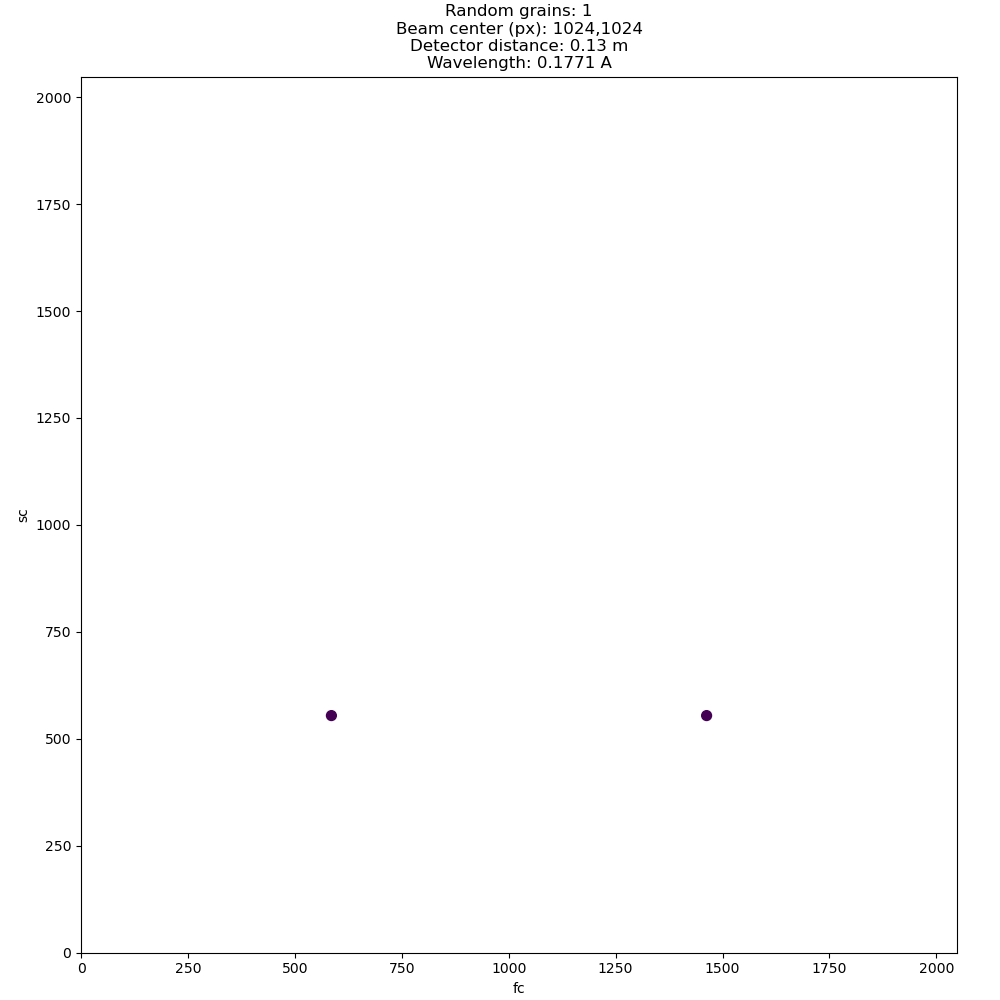

In [44]:
from matplotlib import pyplot as plt
%matplotlib ipympl

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,10))
ax.scatter(fc, sc, s=50, c=inten, norm='log')

ax.set_aspect(1)
ax.set(xlim=(0, 2048), ylim=(0, 2048))
ax.set(xlabel='fc', ylabel='sc',
       title=f"""Random grains: {ng}
Beam center (px): {pars.get('y_center')},{pars.get('z_center')}
Detector distance: {pars.get('distance')/1e6:.4} m
Wavelength: {pars.get('wavelength'):.4} A""")
plt.show()

In [ ]:
cf = ImageD11.columnfile.columnfile(new=True)
cf.nrows = len(sc)
cf.addcolumn(sc, 'sc')
cf.addcolumn(fc, 'fc')
cf.addcolumn(omega, 'omega')
cf.addcolumn(inten, 'sum_intensity')
cf.parameters = pars
cf.updateGeometry()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(cf.ds, cf.eta, s=1)
ax.vlines(ref_ucell.ringds, -25, 25, color='r')
plt.show()

In [ ]:
# map voxel (sx, sy) with a UB and fixed HKL
# data pixel (sc, fc, omega, dty)
# there are two main functions:

# forward projector:
# for a single map voxel, determine the locations and intensities of its peaks in (sc, fc, omega, dty) space, or (tth, eta, omega, dty) space
# we basically have almost this already

# backward projector:
# for a single data pixel (sc, fc, omega, dty), work out which voxels in the grain map it likes
# this is a geometric thing (compute the perfect ray intersection) then crystallography (index the UBIs with the peak)

# in each case, there is a complication - peak spread in (sc, fc, omega, dty) space
# when we forward project, we can't assume "perfect" diffraction
# the forward projection is a convolution of a "perfect" diffraction peak, with a point spread function
# f(d_omega, d_dty, d_sc, d_fc)
# this accounts for the beam-voxel path length intersection (e.g. ASTRA does this), beam profile, energy spread, beam divergence etc

# so for a map voxel, we forward project intensity_calc into some detector pixels
# then we look at the measured intensity in each of those detector pixels
# back-project the intensity difference into a ray through the grain map
# then split the intensity difference into the ray intersection voxels

# the loop is like this:
# the "model" is the input grain map, plus a bunch of parameters
# the parameters are:
# orientation shift, strain shift, point spread shifts

In [ ]:
# the first step is to simulate a very small phantom
# which can effectively test this
# e.g. a 3x3 grid of UB
# where there are local misorientations and strains

In [ ]:
# map voxel (sx, sy) with a UB
# data voxel (sc, fc, omega, dty)
# fixed hkl
# using fixed hkl, we can go from map -> data (iten_calc)

# there is a function f(d_omega, d_dty, d_sc, d_fc) that describes point spread
# we don't know what that function looks like
# we need to know to fit the data
# d_dty is from (path length through map voxel) x (beam intensity profile)
# d_omega - omega steps
# (d_sc, d_fc) - detector psf

# that function describes the matrix elements of A where A.map = data
# where map is a vector over map pixels
# data is a vector over data voxels
# a row of matrix A gives 1 data voxel over all map voxels (backward projector)
# a column of matrix A gives 1 map voxel over all data voxels (forward projector)

# we have the forward projector (sans some geometry stuff which is easy to work out)
# we need the backward projector (this is compute_grain_origins in pbp_refine)

# we have the backward projector geometrically - we have some ray
# we have some hot voxels along the ray
# now 

# forward project - gives inten_calc for all data voxels
# we have inten_obs as well
# get delta_inten
# back project the intensity it into the voxels we hit in the ray
# derivative error w.r.t strain
# back project peak shift
# then we need to decide how to modify the UBIs along the ray
# 

In [45]:
# we want 2D space
# fit position of peak
# fit intensity of peak
# optimize our map to minimize errors compared with our observed data
# we need the right intensity in the right pixel
# otherwise our model (the grain map) is wrong
# what is our residual function that we minimize over?
# take the current grain map, project it onto the detector
# for a given voxel in the sample, we need to decide how to update it to better match the data
# the problem is - it's hard to know how to move a peak around to better match the observations
# this is called Optimal Transport Theory (Carter Cocke)
# your metric can be Earth-movers distance

In [46]:
# we need a single function that goes from map into detector pixels
# this gives us perfect peak positions
# we have some observed peak positions that are discrete on a grid
# we need to minimize the difference between them
# we get (sc_calc, fc_calc)
# we have some broad list of (sc_obs, fc_obs)
# we guess some point spread function
# convolve our (sc_calc, fc_calc) with a point spread function
# too hard

In [ ]:
# take some observed detector pixel
# paint in into the voxels
# fit the UB along the ray 
# all voxels initially have a large spread such that a peak can be assigned
# then optimize the UB and delta(UB) in that voxel to match better the pixel

In [ ]:
# take your model
# forward project it into the detector space
# for each voxel in the map, you know it's contributions to detector pixel intensities
# this needs to be spread-aware
# what do we need to save?
# per voxel - (sc, fc, dty, omega, intensity)
# so we can add intensity_calc into the observed data as a new column to the sparse file

In [ ]:
# loop over sparse detector pixels
# per detector pixel (sc, fc, omega, dty):
    # from (omega, dty) get the path through the map
    # find out which voxels this pixel intersects
    # after that - then assign based on hkl error
    # now you have hits along the ray
    # per voxel in the ray:
        # 
    # partition the intensity between the different voxels it sees
    # 
    # 
    # there's a weighting function for each voxel based on path length through the square
    # there's a weighting function based on (distance in diffraction space)
    # we need a function that says how the intensity falls off as a function of errors in (tth, eta, omega)
    # divide up detector pixel intensity along the voxels
    # per voxel:
        # calculate which detector pixels it hits
        # for those detector pixels, see what's observed and what's calculated
        # 

    # given a voxel, we need to determine how much intensity it would contribute into the pixel of interest
    # given some point spread function
    # when we forward project - sum into the detector pixel
    # when we back project - we have total detector pixel intensity
    # 



In [ ]:
# per detector pixel (sc, fc, omega, dty):
    # spatial intersection
    # diffraction space intersection (index the voxels)
    